<a href="https://colab.research.google.com/github/heath-barnett/chem3020/blob/main/Experimental_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Data
When collecting data from a scientific instrument, a measurement is returned as a value or series of values, and these values are composed of both signal and noise. The signal is the component of interest while the noise is random instrument response resulting from a variety of sources that can include the instrument itself, the sample holder, and even the tiny vibrations of the building. For the most interpretable data, you want the largest signal-to-noise ratio possible in order to reliably identify the features in the data.

This lesson introduces the processing of experimental data including detecting features, removing noise from the data, and fitting the data to mathematical models. We will be using the NumPy library in this chapter and also start to use modules from the SciPy library. SciPy, short for “scientific python,” is one of the core libraries in the scientific Python ecosystem. This library includes a variety of modules for dealing with signal data, performing data transformations, and integrating sampled data among other common tasks in scientific data analysis.

> `constants()` Compilation of scientific constants

> `fft()` Fourier transform functions

> `integrate()` Integration for both functions and sampled data

> `interpolate()` Data interpolation

> `io()` File importers and exporters

> `linalg()` Linear algebra functions

> `optimize()` Optimization algorithms

> `signal()` Signal processing functions

# Loading SciPy
In contrast to SymPy and NumPy, each module from SciPy needs to be imported individually (too many in scipy to load all of them at one time), so import scipy is not going help you much. Instead, you need to do the following to import a module.

`from scipy import <specific module or function>`

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
x = np.linspace(0,10,100)
rng = np.random.default_rng()
noise = rng.random(100)
y_noisy = 2.2 * x + 3 * noise
y2_noisy = 3.4 * x**2 + 4 * x + 7 + 3 * noise

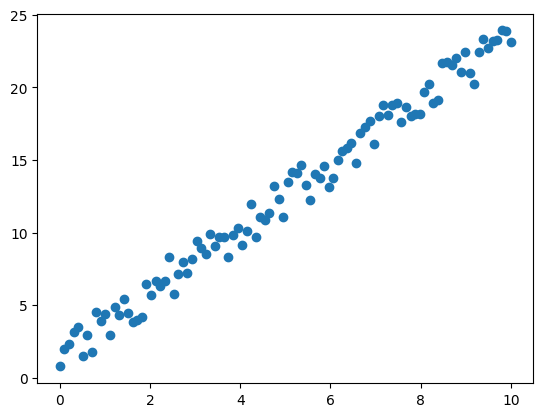

In [5]:
plt.scatter(x,y_noisy)

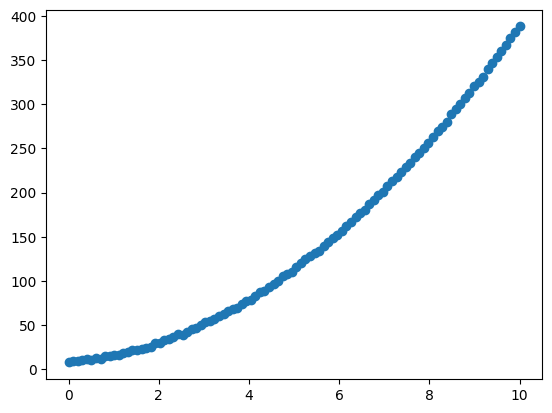

In [7]:
plt.scatter(x,y2_noisy)

In [8]:
a, b = np.polyfit(x, y_noisy, 1)
print((a, b))

(2.240345787067625, 1.4083590664577068)


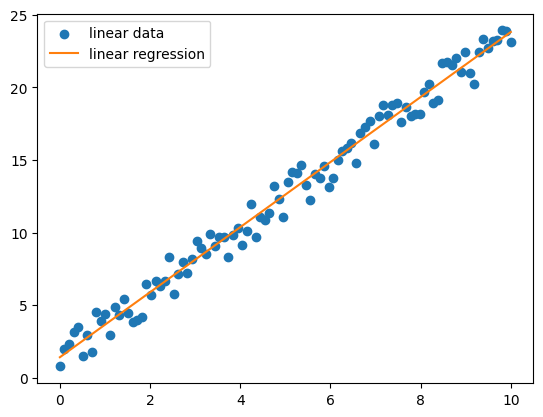

In [9]:
y_reg = a*x + b

plt.scatter(x, y_noisy, label='linear data')
plt.plot(x, y_reg, 'C1-', label='linear regression')
plt.legend();

In [12]:
from scipy import stats
print(stats.linregress(x, y_noisy))

LinregressResult(slope=2.240345787067626, intercept=1.4083590664576988, rvalue=0.9917608814239899, pvalue=2.8152656303040152e-89, stderr=0.029231696348199623, intercept_stderr=0.1691949258415212)


(3.4098864316047885, 3.9414814710197152, 8.571468544112516)


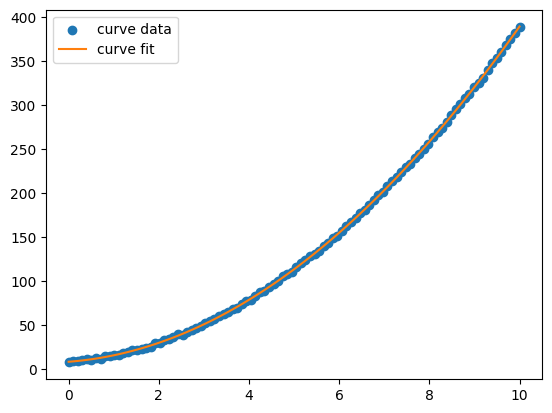

In [14]:
a, b, c = np.polyfit(x, y2_noisy, 2)
print((a, b, c))

y_fit = a*x**2 + b*x + c

plt.scatter(x, y2_noisy, label='curve data')
plt.plot(x, y_fit, 'C1-', label='curve fit')
plt.legend();

In [19]:
from sympy import *
x = symbols('x')
y_fit = a*x**2 + b*x + c
display(sympify(y_fit))

3.40988643160479*x**2 + 3.94148147101972*x + 8.57146854411252